In [1]:
# Cargamos todas las librerías
import pandas as pd 
import math as mt 
import numpy as np 
from scipy import stats as st 
from math import factorial 
import seaborn as sns  
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#traemos los datasets 
company=pd.read_csv('/datasets/project_sql_result_01.csv')
neighborhoods=pd.read_csv('/datasets/project_sql_result_04.csv')
trips_loop_airport=pd.read_csv('/datasets/project_sql_result_07.csv',parse_dates=['start_ts'])

Revisamos la información de los datasets para verificar si efectivamente contienen los datos descritos en la descripción del proyecto.


In [3]:
company.info()
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


No se presentan datos nulos en ninguno de los datasets. 
Considero que los tipos de datos son correctos para la continuación del análisis. 

Identificamos los 10 principales barrios en términos de finalización del recorrido. 

In [4]:
top10_neighborhoods = neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print(top10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Ahora, graficamos lo siguiente: 
Empresas de taxis y su número correspondiente de viajes. 
Los 10 barrios principales por número de finalizaciones

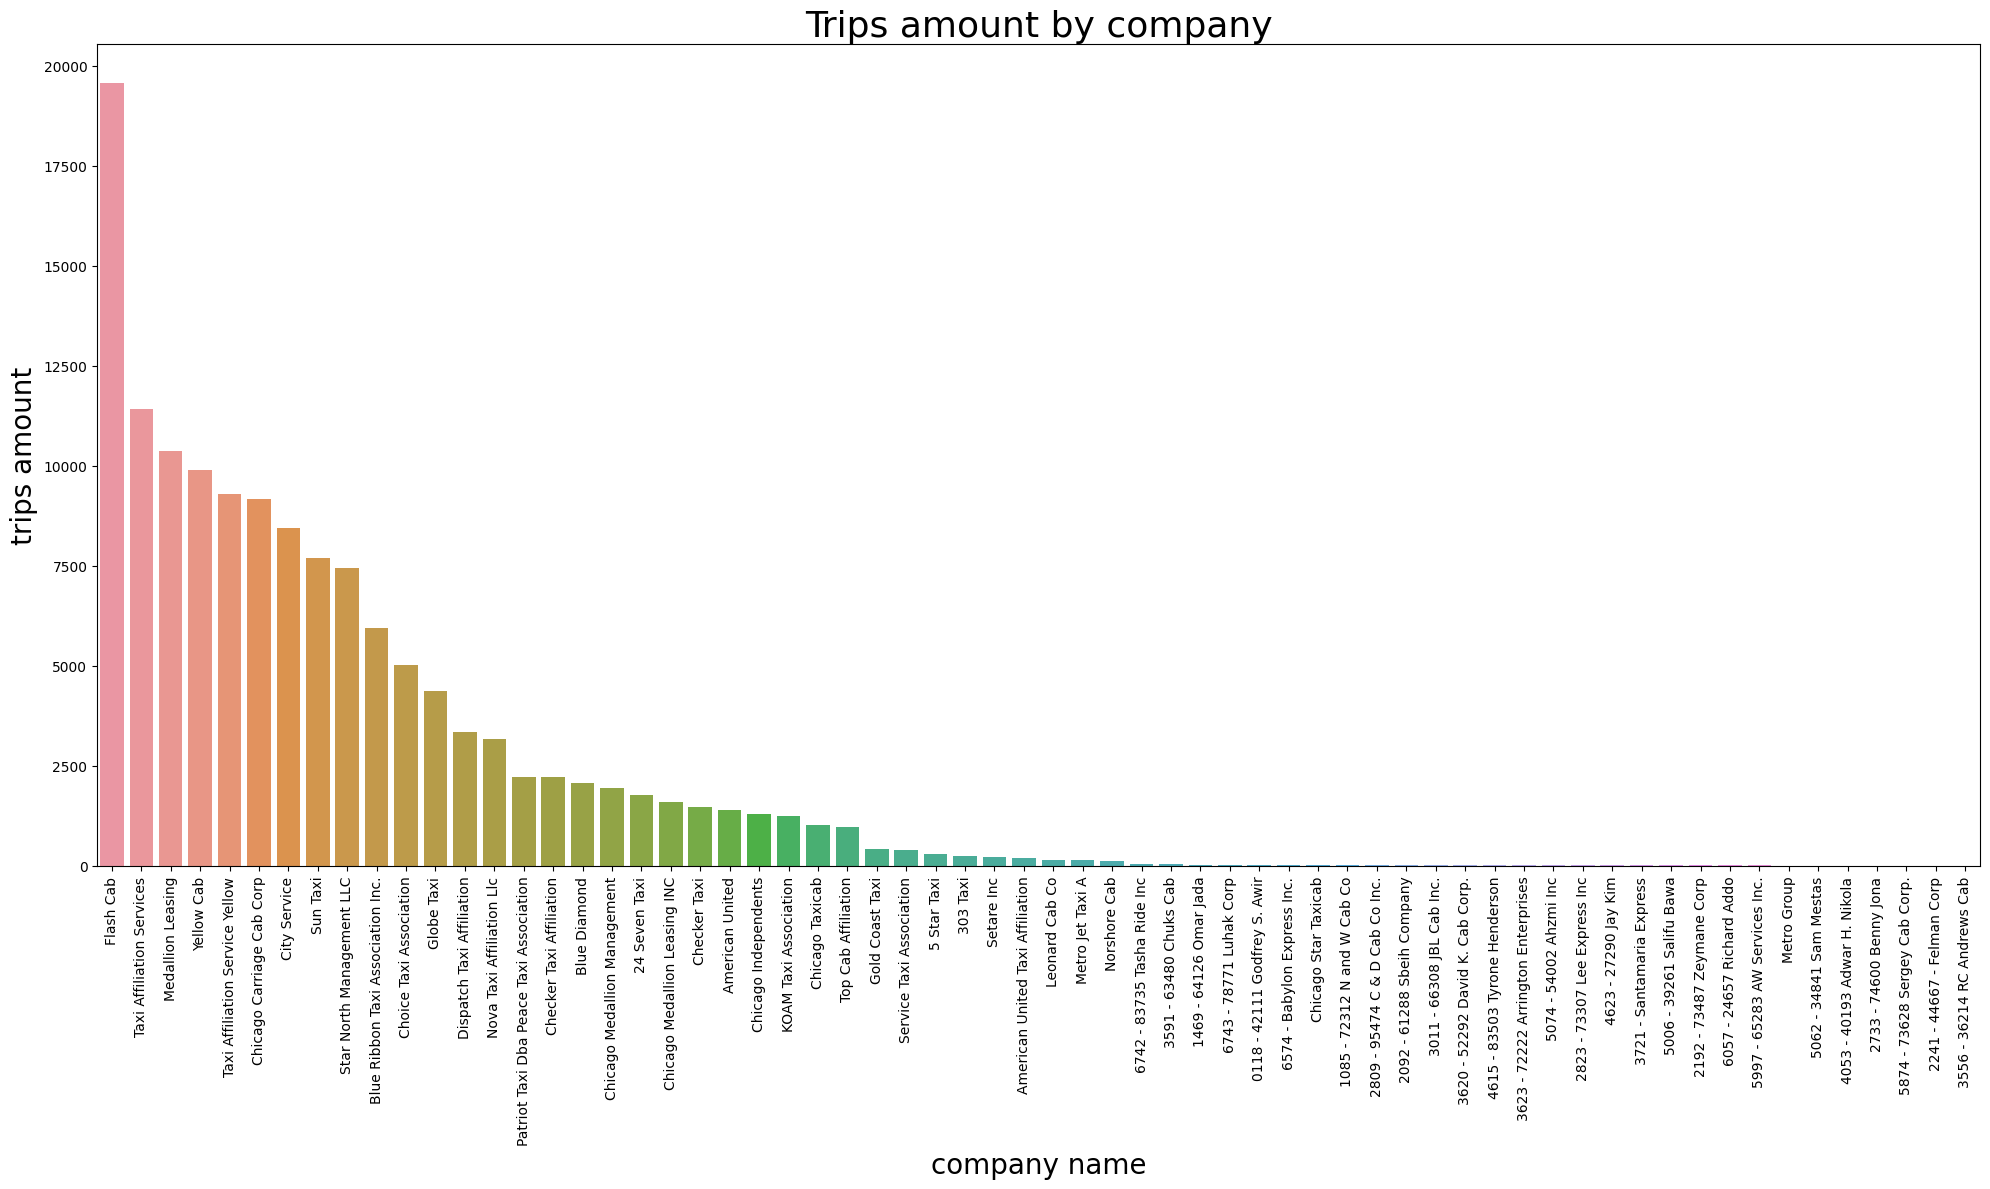

In [6]:
plt.figure(figsize=(20, 12))

# Usar Seaborn para crear un gráfico de barras
sns.barplot(x='company_name', y='trips_amount', data=company)

# Añadir título y etiquetas
plt.title('Trips amount by company', fontsize=26)
plt.xlabel('company name', fontsize=20)
plt.ylabel('trips amount', fontsize=20)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Muy buena visualización. La elección del gráfico de barras y el orden descendente permiten comunicar claramente la dominancia de algunas compañías en la cantidad de viajes.
</div>


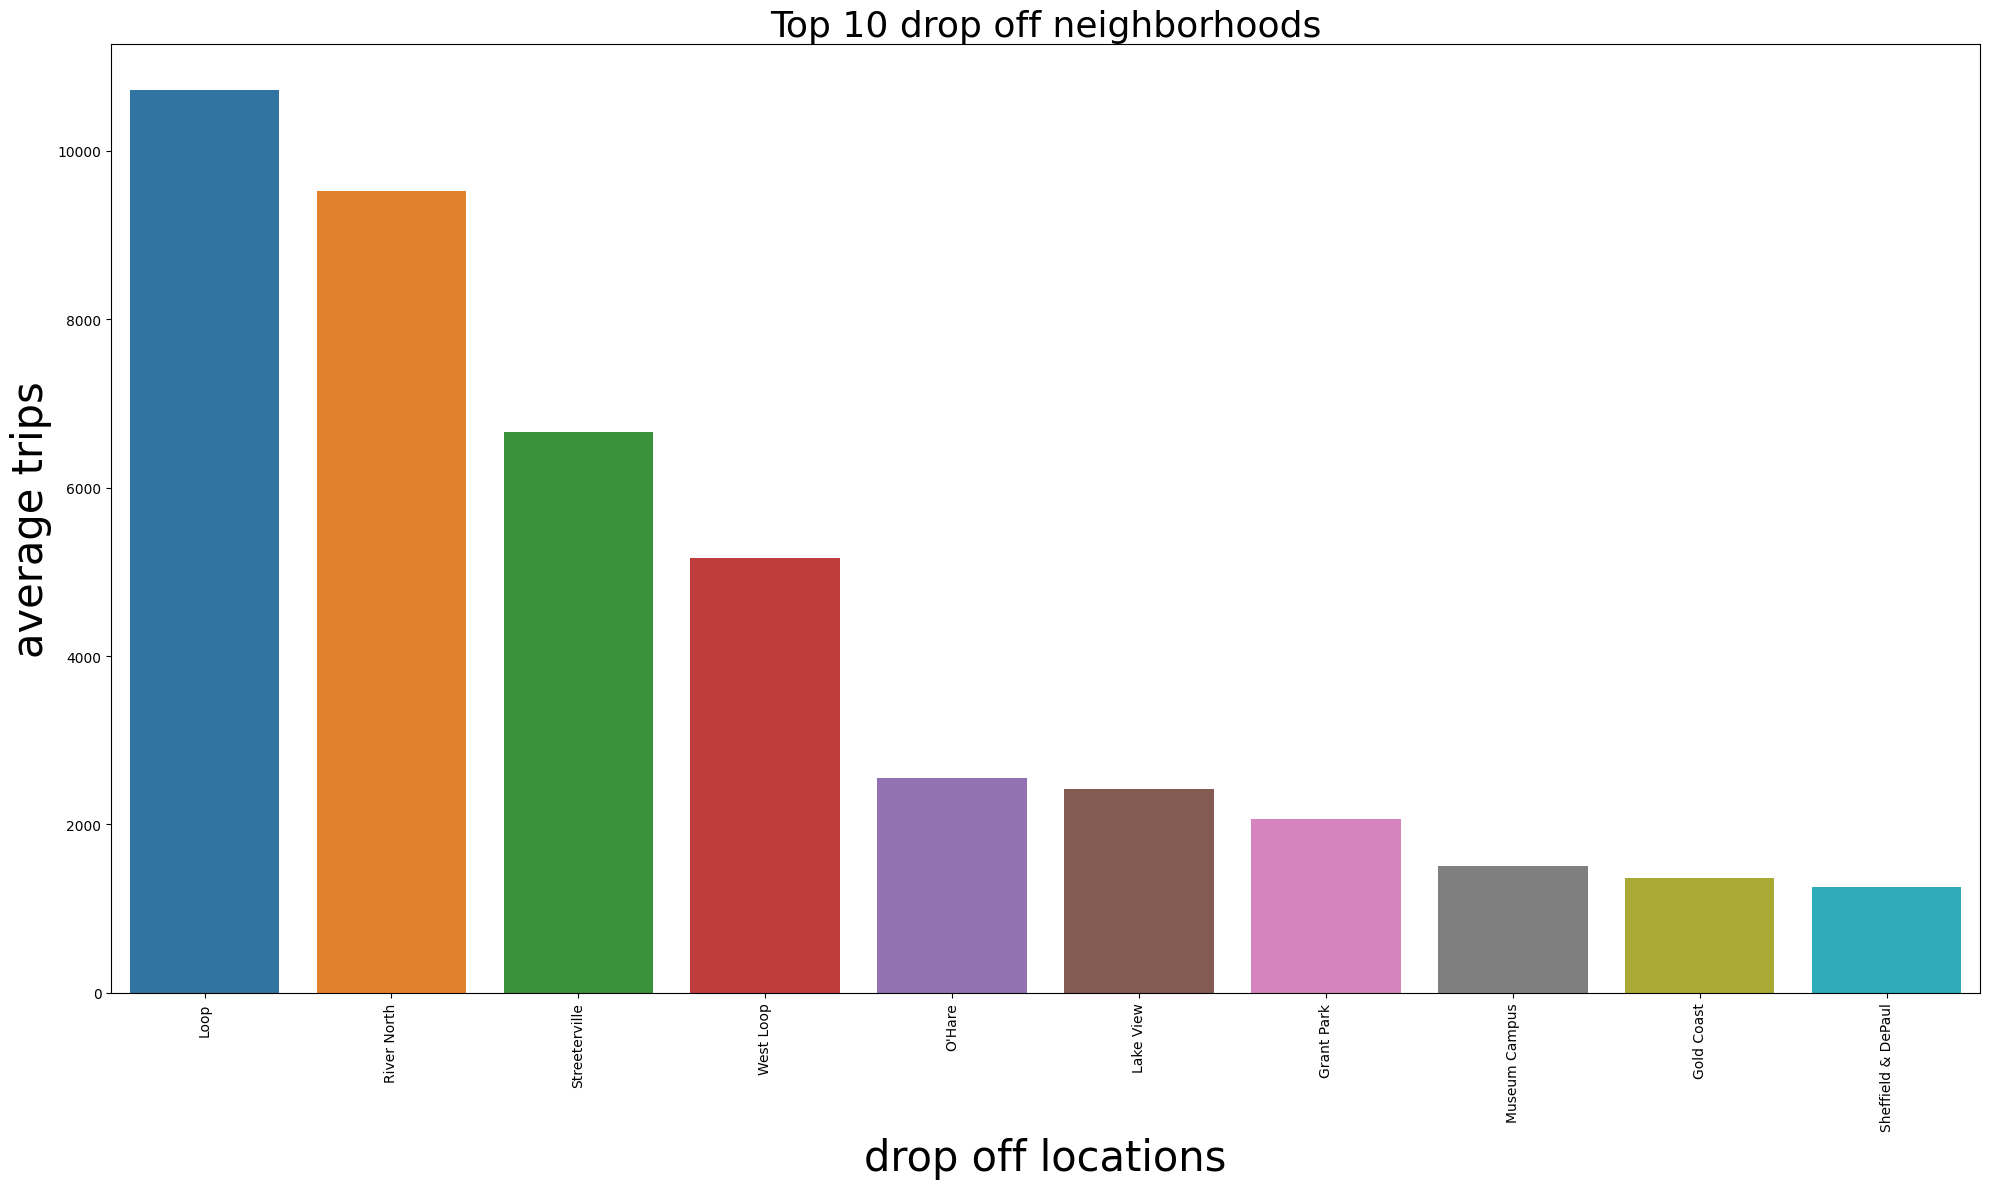

In [7]:
plt.figure(figsize=(20, 12))

# Usar Seaborn para crear un gráfico de barras
sns.barplot(x='dropoff_location_name', y='average_trips', data=top10_neighborhoods)

# Añadir título y etiquetas
plt.title('Top 10 drop off neighborhoods', fontsize=26)
plt.xlabel('drop off locations', fontsize=30)
plt.ylabel('average trips', fontsize=30)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Conclusiones.
1. A nivel de procesamiento de datos, no se presentaron valores nulos que requirieran un tratamiento especial o procesamiento particular.
2. Flash Cab es una compañía de taxis muy consolidada con una demanda muy alta en comparación con su competencia, esto se evidencia de manera sencilla en la gráfica "Trips amount by company".
3. A nivel da datos, se pudo evidenciar que Loop cuenta con un promedio de viajes mucho más alto en comparación con O'hare, este dato es posible visualizarse en la gráfica "Top 10 drop off neighborhoods". 

Revisamos la información en el dataframe trips_loop_airport

In [8]:
trips_loop_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Sobre el dataframe, se requirió ajustar el tipo de datos para la columna "start_ts", pasándolo de tipo object a tipo datetime. 
No se evidencian valores nulos. 

Ahora, para el análisis, crearemos dos columnas ("day_of_week" y "is_rainy") para involucrar los datos de cada columna dentro del análisis para la hipótesis. 

In [9]:

trips_loop_airport['day_of_week'] = trips_loop_airport['start_ts'].dt.day_name()
trips_loop_airport['is_rainy'] = trips_loop_airport['weather_conditions'].str.contains('rain', case=False, na=False)

# Filtrar solo sábados
saturdays = trips_loop_airport[trips_loop_airport['day_of_week'] == 'Saturday']

# Separar en dos grupos: sábados lluviosos y no lluviosos
rainy = saturdays[saturdays['is_rainy'] == True]['duration_seconds']
not_rainy = saturdays[saturdays['is_rainy'] == False]['duration_seconds']

# Nivel de significancia
alpha = 0.05

# Prueba t (no asumimos igual varianza → equal_var=False)
t_stat, p_value = stats.ttest_ind(rainy, not_rainy, equal_var=False)

print("Estadístico t:", t_stat)
print("Valor p:", p_value)

if p_value < alpha:
    print("Rechazamos la hipótesis nula: la duración promedio sí cambia los sábados lluviosos.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula.")

Estadístico t: nan
Valor p: nan
No hay evidencia suficiente para rechazar la hipótesis nula.


Elegimos una prueba t porque estamos comparando la media de dos grupos numéricos independientes.

El nivel de significancia (α = 0.05) es el valor estándar usado en la mayoría de los análisis estadísticos.